Dataset Description:

Date: Date of the electricity consumption recording


Time: Time of the electricity consumption recording.
Global_active_power: Total active power consumed by the household.
Global_reactive_power: Total reactive power consumed by the household.
Voltage: Voltage level during the electricity consumption period.
Global_intensity: Total current intensity consumed by the household.
Sub_metering_1: Electricity consumption in sub-metering 1 (e.g., kitchen).
Sub_metering_2: Electricity consumption in sub-metering 2 (e.g., laundry).
Sub_metering_3: Electricity consumption in sub-metering 3 (e.g., water heater).

In [ ]:
# Import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [ ]:
data=pd.read_csv('household_power_consumption.txt',delimiter=';')

In [ ]:
data.shape

(2075259, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.9460,0.0000,240.4300,4.0000,0.0000,0.0000,0.0000
2075255,26/11/2010,20:59:00,0.9440,0.0000,240.0000,4.0000,0.0000,0.0000,0.0000
2075256,26/11/2010,21:00:00,0.9380,0.0000,239.8200,3.8000,0.0000,0.0000,0.0000
2075257,26/11/2010,21:01:00,0.9340,0.0000,239.7000,3.8000,0.0000,0.0000,0.0000
2075258,26/11/2010,21:02:00,0.9320,0.0000,239.5500,3.8000,0.0000,0.0000,0.0000


In [ ]:
data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
data.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [ ]:
data.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
categorical_values = []
numerical_values = []

for column in data.columns:
    if data[column].nunique() < 10:
        categorical_values.append(column)
    else:
        numerical_values.append(column)

In [ ]:
print(categorical_values)

[]


In [ ]:
print(numerical_values)

['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


This code combines two columns, 'Date' and 'Time', into a single column named 'date_time' and converts the values in this column to datetime format using Pandas.

Here's what each part of the code does:

1. `data['Date'] + ' ' + data['Time']`: This concatenates the values in the 'Date' column with a space in between (' ') and the values in the 'Time' column. This creates a new series of strings representing both date and time together.

2. `pd.to_datetime(...)`: This converts the series of concatenated date and time strings into datetime objects. Pandas' `to_datetime()` function is used for this conversion.

3. `data['date_time'] = ...`: This assigns the resulting datetime objects to a new column named 'date_time' in the DataFrame `data`. So, 'date_time' column will contain the combined datetime values from 'Date' and 'Time' columns.

In [ ]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
# by combining the two columns and converting to datetime format
data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

This code performs two operations on the DataFrame `data`:

1. `pd.to_numeric(data['Global_active_power'], errors='coerce')`: This converts the values in the 'Global_active_power' column to numeric format. The `errors='coerce'` parameter ensures that if any value cannot be converted to numeric format, it will be replaced with NaN (Not a Number).

2. `data = data.dropna(subset=['Global_active_power'])`: This removes any rows from the DataFrame where the 'Global_active_power' column has NaN values. The `dropna()` function with the parameter `subset=['Global_active_power']` ensures that only rows with NaN values in the 'Global_active_power' column are dropped, leaving the rest of the DataFrame intact.

In [ ]:
# Convert the 'Global_active_power' column to numeric format
# and remove any rows with NaN values
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

In [ ]:
# Convert the 'date_time' column to datetime format
data['date_time'] = pd.to_datetime(data['date_time'])

This code adds new columns to the DataFrame `data` to represent the year, quarter, month, and day of each timestamp in the 'date_time' column.

Here's what each line of code does:

1. `data['year'] = data['date_time'].apply(lambda x: x.year)`: This creates a new column named 'year' and assigns to it the year component of each timestamp in the 'date_time' column. The `apply()` function is used to apply the lambda function `lambda x: x.year` to each element of the 'date_time' column.

2. `data['quarter'] = data['date_time'].apply(lambda x: x.quarter)`: This creates a new column named 'quarter' and assigns to it the quarter component of each timestamp in the 'date_time' column. The `apply()` function is used to apply the lambda function `lambda x: x.quarter` to each element of the 'date_time' column.

3. `data['month'] = data['date_time'].apply(lambda x: x.month)`: This creates a new column named 'month' and assigns to it the month component of each timestamp in the 'date_time' column. The `apply()` function is used to apply the lambda function `lambda x: x.month` to each element of the 'date_time' column.

4. `data['day'] = data['date_time'].apply(lambda x: x.day)`: This creates a new column named 'day' and assigns to it the day component of each timestamp in the 'date_time' column. The `apply()` function is used to apply the lambda function `lambda x: x.day` to each element of the 'date_time' column.

As a result, the DataFrame `data` will now have additional columns 'year', 'quarter', 'month', and 'day', containing the respective date components extracted from the 'date_time' column.

In [ ]:
# Create new columns for year, quarter, month, and day
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

In [ ]:
# Sort the data by date_time in ascending order
data.sort_values('date_time', inplace=True, ascending=True)

In [ ]:
# Reset the index of the data
data = data.reset_index(drop=True)

In [ ]:
# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [ ]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Display the last 5 rows of the data
data.tail(5)

Number of rows and columns: (2049280, 15)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-11-26 21:02:00


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,quarter,month,day,weekday
2049275,26/11/2010,20:58:00,0.9460,0.0000,240.4300,4.0000,0.0000,0.0000,0.0000,2010-11-26 20:58:00,2010,4,11,26,1
2049276,26/11/2010,20:59:00,0.9440,0.0000,240.0000,4.0000,0.0000,0.0000,0.0000,2010-11-26 20:59:00,2010,4,11,26,1
2049277,26/11/2010,21:00:00,0.9380,0.0000,239.8200,3.8000,0.0000,0.0000,0.0000,2010-11-26 21:00:00,2010,4,11,26,1
2049278,26/11/2010,21:01:00,0.9340,0.0000,239.7000,3.8000,0.0000,0.0000,0.0000,2010-11-26 21:01:00,2010,4,11,26,1
2049279,26/11/2010,21:02:00,0.9320,0.0000,239.5500,3.8000,0.0000,0.0000,0.0000,2010-11-26 21:02:00,2010,4,11,26,1


In [ ]:
!pip install stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24283 sha256=e6dd394a08996244787299fcbf8117a3b45bed1b492539a2a11f1d2039a72b36
  Stored in directory: /root/.cache/pip/wheels/57/7d/91/f1d0158783f74ab6ad725b00aa6a2c6e976cea652eb72616c6
Successfully built stats


This code tests for the normality of the 'Global_active_power' data using the D'Agostino-Pearson normality test.

Here's a breakdown of what each part of the code does:

1. `import scipy.stats as stats`: This imports the `stats` module from SciPy, which contains various statistical functions including the D'Agostino-Pearson normality test.

2. `stat, p = stats.normaltest(data.Global_active_power)`: This calculates the test statistics and p-value for the normality test using the `normaltest()` function from SciPy's `stats` module. The 'Global_active_power' column from the DataFrame `data` is passed as input to this function.

3. `print('Statistics=%.3f, p=%.3f' % (stat, p))`: This prints out the test statistics and p-value obtained from the normality test. The `%` formatting operator is used to insert the values of `stat` and `p` into the string.

4. `alpha = 0.05`: This sets the significance level to 0.05.

5. `if p > alpha:`: This checks if the p-value is greater than the significance level.

6. `print('Data looks Gaussian (fail to reject H0)')`: If the p-value is greater than the significance level, it prints out "Data looks Gaussian (fail to reject H0)", indicating that there is not enough evidence to reject the null hypothesis that the data is normally distributed.

7. `print('Data does not look Gaussian (reject H0)')`: If the p-value is less than or equal to the significance level, it prints out "Data does not look Gaussian (reject H0)", indicating that there is enough evidence to reject the null hypothesis that the data is normally distributed.

The purpose of this code is to statistically assess whether the 'Global_active_power' data follows a normal distribution or not. Depending on the outcome, you can decide whether parametric statistical tests can be applied to the data. If the data is normally distributed, parametric tests may be more appropriate; otherwise, non-parametric tests might be necessary.

In [ ]:
# Test for Normality of the Global Active Power Data

# Import the required libraries
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(data.Global_active_power)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')


Statistics=724881.795, p=0.000
Data does not look Gaussian (reject H0)


This code generates a distribution plot (histogram with a fitted probability density function) of the 'Global_active_power' data using Seaborn (`sns`). Additionally, it calculates and prints the kurtosis and skewness of the distribution.

Here's a breakdown of each part of the code:

1. `sns.distplot(data.Global_active_power, color='purple')`: This line creates a distribution plot of the 'Global_active_power' data using Seaborn's `distplot` function. The `color` parameter is set to 'purple' to specify the color of the plot.

2. `print('Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))`: This line calculates the kurtosis of the 'Global_active_power' data using the `kurtosis` function from SciPy's `stats` module. Kurtosis measures the tailedness or peakedness of a distribution. It then prints out the calculated kurtosis value.

3. `print('Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))`: This line calculates the skewness of the 'Global_active_power' data using the `skew` function from SciPy's `stats` module. Skewness measures the asymmetry of the distribution. It then prints out the calculated skewness value.

The purpose of these lines is to provide additional statistical information about the distribution of the 'Global_active_power' data beyond just visualizing it with a distribution plot. This information can help in understanding the shape and characteristics of the data distribution.

Kurtosis of normal distribution: 4.218671866132123
Skewness of normal distribution: 1.7862320846320818


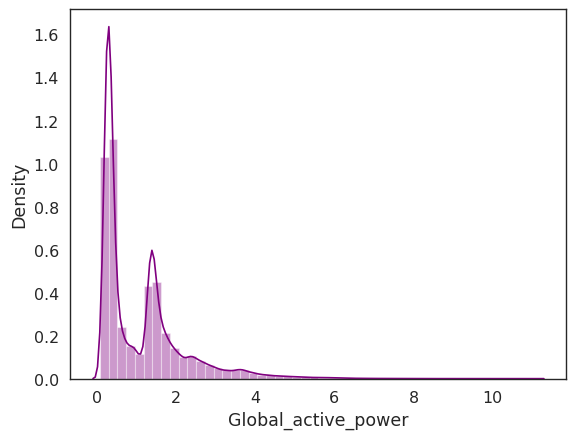

In [ ]:
sns.distplot(data.Global_active_power,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

This code filters the DataFrame `data` to extract data for a specific time frame, from July 1, 2010, to July 15, 2010. Then, it creates a line plot of the 'Global_active_power' against the corresponding dates within that time frame.

Here's a breakdown of each part of the code:

1. `data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]`: This line creates a new DataFrame `data1` by filtering the original DataFrame `data` to include only rows where the 'date_time' column falls between July 1, 2010, and July 15, 2010 (excluding July 16, 2010).

2. `plt.figure(figsize=(14,6))`: This line creates a new figure with a specified size of 14 inches in width and 6 inches in height.

3. `plt.plot(data1.date_time, data1.Global_active_power, color='purple')`: This line creates a line plot of 'Global_active_power' against 'date_time' using the data from the DataFrame `data1`. The line color is set to 'purple'.

4. `plt.ylabel('Global Active Power (kW)', fontsize=12)`: This line sets the label for the y-axis to 'Global Active Power (kW)' with a font size of 12.

5. `plt.xlabel('Date', fontsize=12)`: This line sets the label for the x-axis to 'Date' with a font size of 12.

6. `plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)`: This line sets the title of the plot to 'Active Power Consumption for a Particular Time Frame' with a font size of 14.

7. `plt.tight_layout()`: This line adjusts the layout of the plot to prevent overlapping elements.

8. `plt.grid(True)`: This line adds gridlines to the plot.

9. `sns.despine(bottom=True, left=True)`: This line removes the spines (the borders) from the bottom and left sides of the plot, leaving only the top and right spines.

10. `plt.show()`: This line displays the plot.

The purpose of this code is to visualize the active power consumption over a specific time frame, providing insights into the trends or patterns during that period.

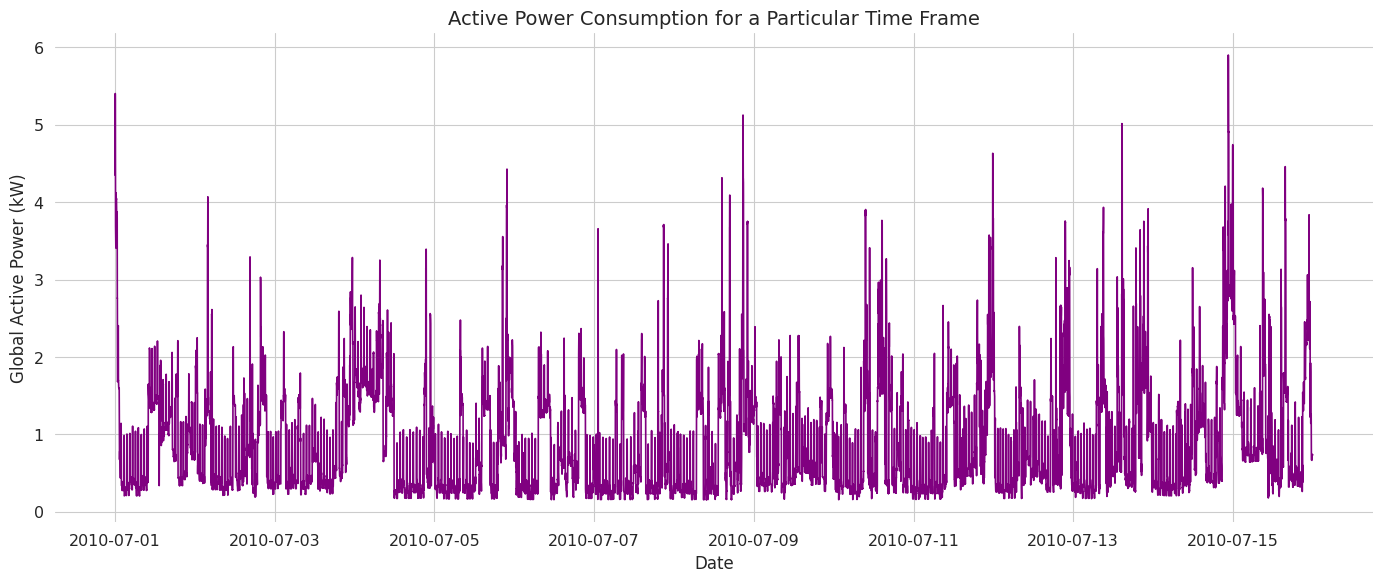

In [ ]:
data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data1.Global_active_power, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

This code creates a figure with two subplots, each displaying a violin plot of the global active power data, grouped by year in the first subplot and by quarter in the second subplot. Here's a breakdown of the code:

1. `plt.figure(figsize=(14,5))`: This creates a new figure with a specified size of 14 inches in width and 5 inches in height.

2. `plt.subplot(1,2,1)`: This creates the first subplot with a grid layout of 1 row and 2 columns, and selects the first subplot for plotting.

3. `plt.subplots_adjust(wspace=0.2)`: This adjusts the horizontal spacing between the subplots to avoid overlap.

4. `sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')`: This creates a violin plot using Seaborn's `violinplot` function. The x-axis represents years, the y-axis represents global active power, and the data is taken from the DataFrame `data`. The color of the violins is set to 'purple'.

5. `plt.xlabel('Year', fontsize=12)`: This sets the label for the x-axis to 'Year' with a font size of 12.

6. `plt.title('Violin plot of Yearly Global Active Power', fontsize=14)`: This sets the title of the first subplot to 'Violin plot of Yearly Global Active Power' with a font size of 14.

7. `sns.despine(left=True, bottom=True)`: This removes the spines on the left and bottom sides of the plot to make it cleaner.

8. `plt.tight_layout()`: This adjusts the layout of the plot to prevent overlapping elements.

9. The code then repeats similar steps to create the second subplot for quarterly global active power, changing the x-axis to 'Quarter' and the title accordingly.

The purpose of this code is to visually represent the distribution of global active power data across different years and quarters using violin plots, which provide insights into the data distribution and any potential outliers.

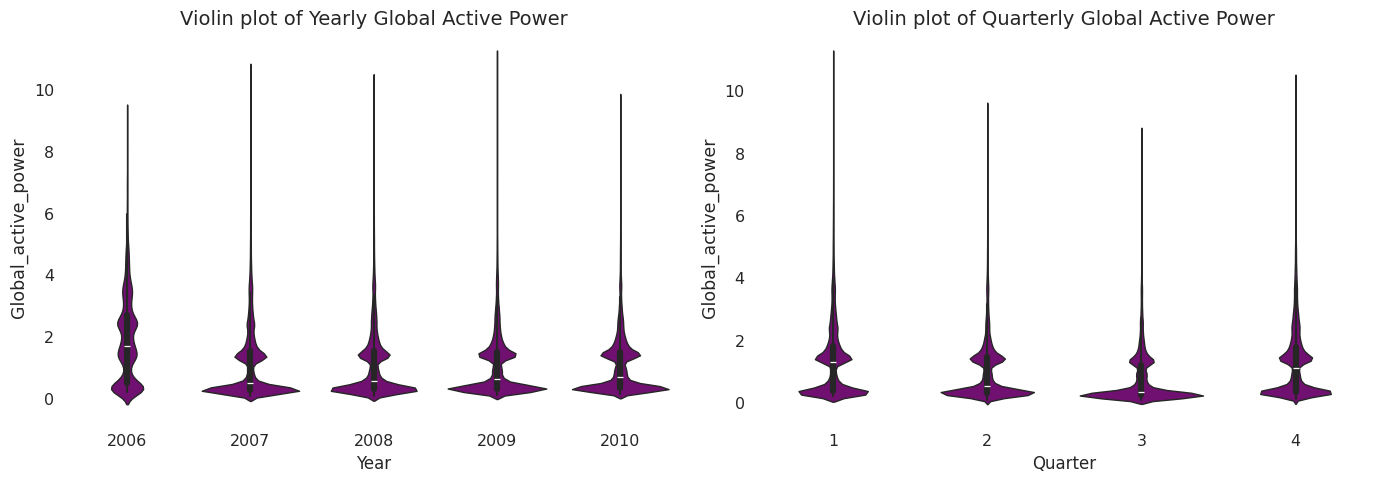

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
plt.figure(figsize=(14,5))

# Plot the first subplot showing the violinplot of yearly global active power
plt.subplot(1,2,1)
# Adjust the subplot's width
plt.subplots_adjust(wspace=0.2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
# Label the x-axis
plt.xlabel('Year', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout()

# Plot the second subplot showing the violinplot of quarterly global active power
plt.subplot(1,2,2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')
# Label the x-axis
plt.xlabel('Quarter', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout()

This code creates a figure with two subplots:

1. The first subplot displays a histogram of the 'Global_active_power' column from the DataFrame `data1`.
2. The second subplot displays a normal probability plot of the 'Global_active_power' column.

Here's a breakdown of each part of the code:

1. `plt.figure(figsize=(15,7))`: This creates a new figure with a specified size of 15 inches in width and 7 inches in height.

2. `plt.subplot(1,2,1)`: This creates the first subplot with a grid layout of 1 row and 2 columns, and selects the first subplot for plotting.

3. `data1['Global_active_power'].hist(bins=70, color='purple')`: This creates a histogram of the 'Global_active_power' column from the DataFrame `data1`. The histogram is divided into 70 bins, and the color is set to 'purple'.

4. `plt.title('Global Active Power Distribution', fontsize=16)`: This sets the title of the first subplot to 'Global Active Power Distribution' with a font size of 16.

5. `plt.subplot(1,2,2)`: This creates the second subplot with a grid layout of 1 row and 2 columns, and selects the second subplot for plotting.

6. `stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)`: This creates a normal probability plot of the 'Global_active_power' column using the `probplot` function from SciPy's `stats` module. The `plot` parameter is set to `plt` to specify the current plot, and `fit=True` indicates that a linear fit should be applied to the data. The `rvalue=True` parameter prints out the correlation coefficient (r-value) on the plot.

7. `plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')`: This adds a line to the normal probability plot to represent a perfectly normal distribution. The line is dashed ('--') and colored 'purple'.

8. `plt.title('Normal Probability Plot of Global Active Power', fontsize=14)`: This sets the title of the second subplot to 'Normal Probability Plot of Global Active Power' with a font size of 14.

9. `print(data1.describe().T)`: This prints out the summary statistics (count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) of the 'Global_active_power' column from the DataFrame `data1`. The `.T` transposes the summary statistics for better readability.

                         count                           mean  \
Global_active_power 21599.0000                         0.8464   
Sub_metering_3      21599.0000                         5.0133   
date_time                21599  2010-07-08 11:59:01.572294912   
year                21599.0000                      2010.0000   
quarter             21599.0000                         3.0000   
month               21599.0000                         7.0000   
day                 21599.0000                         7.9997   
weekday             21599.0000                         0.7333   

                                     min                  25%  \
Global_active_power               0.1580               0.3360   
Sub_metering_3                    0.0000               0.0000   
date_time            2010-07-01 00:00:00  2010-07-04 17:59:30   
year                           2010.0000            2010.0000   
quarter                           3.0000               3.0000   
month                   

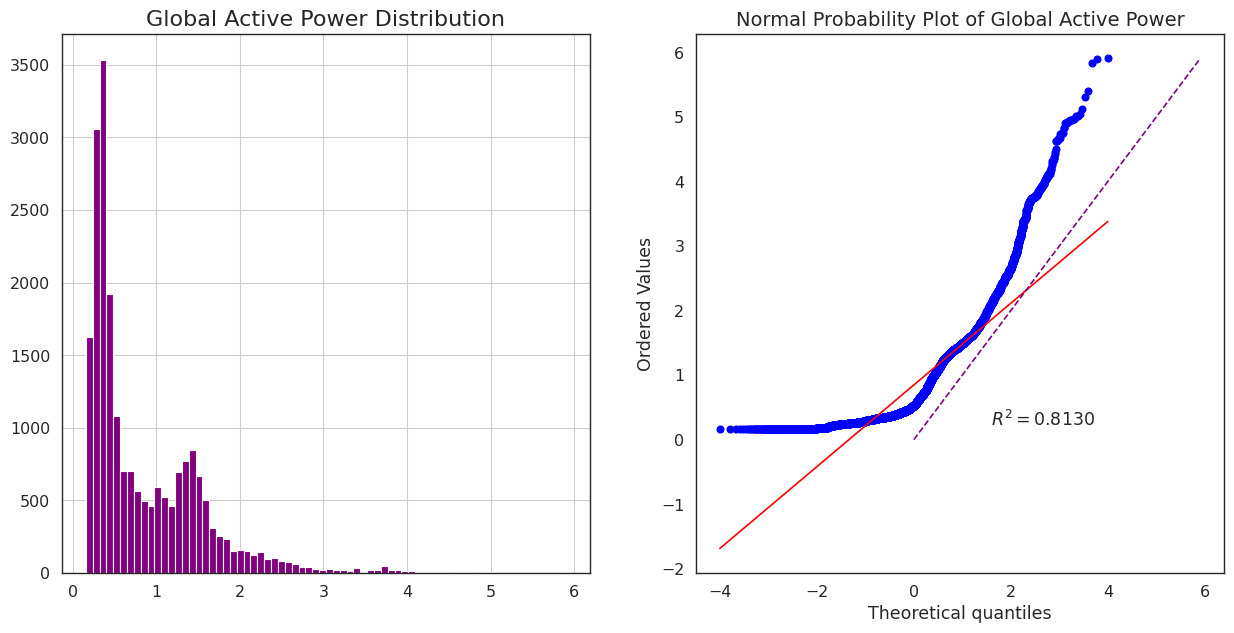

In [ ]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data1.describe().T)

This code selects the 'date_time' and 'Global_active_power' columns from the DataFrame `data` and assigns them to a new DataFrame `data1`. Then, it sets the 'date_time' column as the index of `data1`.

Here's a breakdown of each part of the code:

1. `data1=data.loc[:,['date_time','Global_active_power']]`: This line creates a new DataFrame `data1` by selecting only the 'date_time' and 'Global_active_power' columns from the original DataFrame `data` using the `loc` accessor. The `:` indicates that we want to select all rows.

2. `data1.set_index('date_time',inplace=True)`: This line sets the 'date_time' column as the index of the DataFrame `data1`. The `inplace=True` parameter modifies the DataFrame `data1` in place without returning a new DataFrame.

After running this code, `data1` will contain only the 'date_time' and 'Global_active_power' columns from the original DataFrame `data`, with the 'date_time' column set as the index.

In [ ]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

This code creates a figure with 5 subplots vertically stacked. Each subplot represents the resampled mean of 'Global_active_power' over different time frequencies: day, week, month, quarter, and year.

Here's a breakdown of the code:

1. `fig = plt.figure(figsize=(22,20))`: This creates a new figure with a specified size of 22 inches in width and 20 inches in height.

2. `fig.subplots_adjust(hspace=1)`: This adjusts the vertical spacing between subplots to avoid overlap.

3. `ax1 = fig.add_subplot(5,1,1)`: This creates the first subplot in a grid layout of 5 rows and 1 column, and selects the first subplot for plotting.

4. `ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')`: This plots the resampled mean of 'Global_active_power' over days and sets the line color to 'purple'.

5. `ax1.set_title('Mean Global active power resampled over day')`: This sets the title of the first subplot to 'Mean Global active power resampled over day'.

6. `ax1.tick_params(axis='both', which='major')`: This sets the major tick parameters for both the x-axis and y-axis of the first subplot.

7. Similar steps are repeated for the remaining subplots, changing the resampling frequency and subplot titles accordingly.

The purpose of this code is to visualize how the mean global active power changes over different time frequencies (day, week, month, quarter, and year) using subplots. This can provide insights into the overall trends and patterns in the data over time.

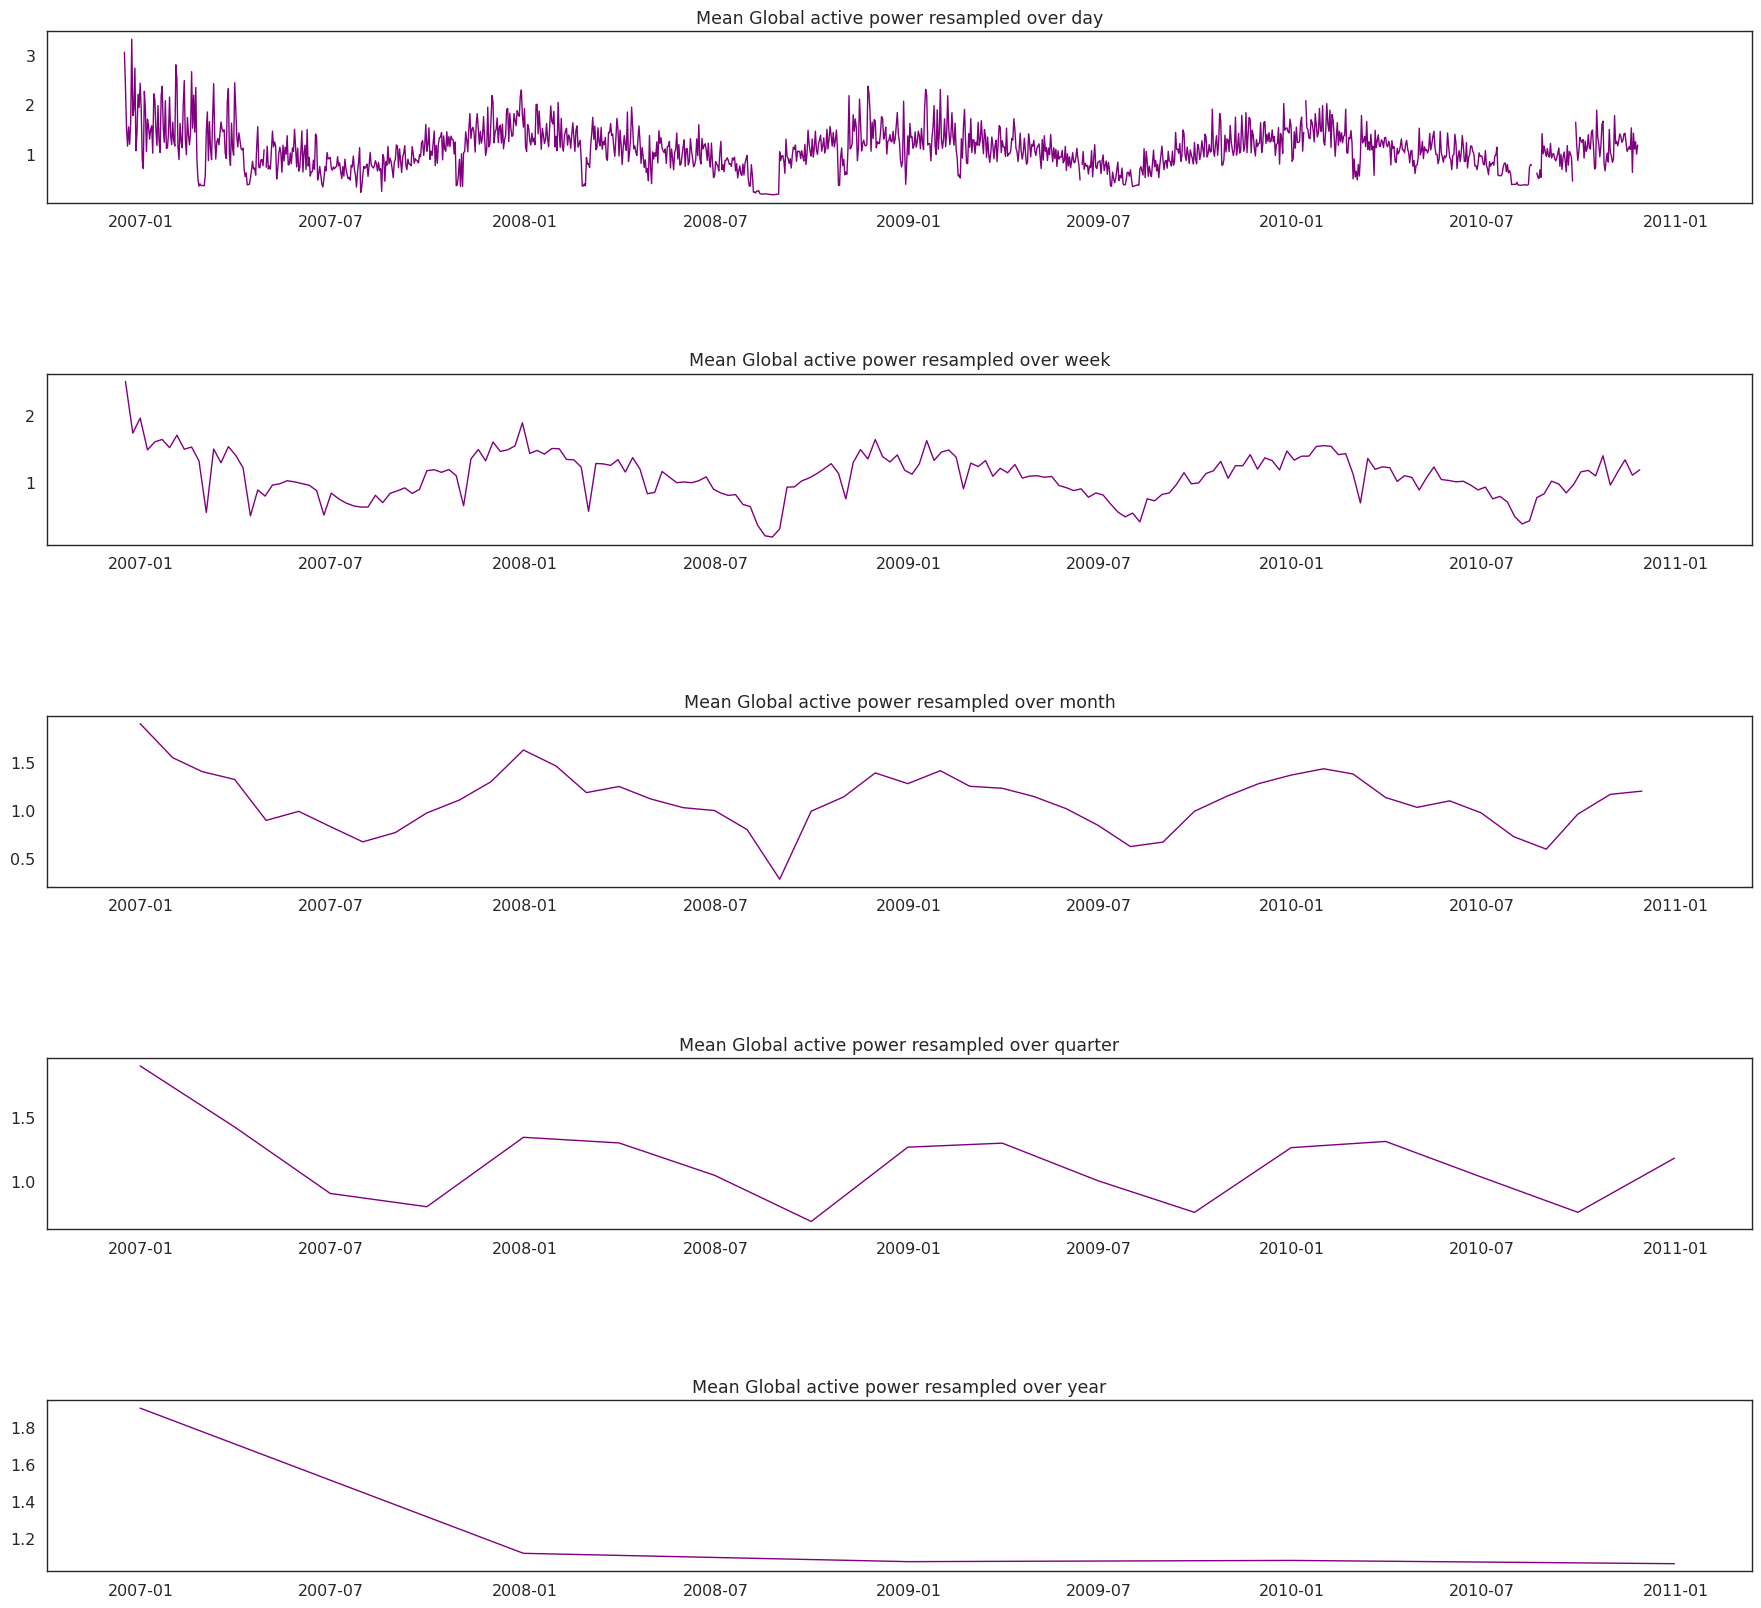

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

This code creates a figure with 4 subplots arranged in a 2x2 grid. Each subplot represents the average global active power grouped by year, quarter, month, and day, respectively.

Here's a breakdown of each part of the code:

1. `plt.figure(figsize=(16,10))`: This creates a new figure with a specified size of 16 inches in width and 10 inches in height.

2. Subplot 1 (Top Left):
   - `plt.subplot(2,2,1)`: This creates the first subplot in a grid layout of 2 rows and 2 columns and selects the first subplot for plotting.
   - `grouped_by_year = data.groupby('year').Global_active_power.agg('mean')`: This groups the data by year and calculates the mean of 'Global_active_power' for each year.
   - `grouped_by_year.plot(color='purple')`: This plots the mean of 'Global_active_power' by year with the color set to 'purple'.
   - `plt.xlabel('')`: This sets the x-label to be empty.
   - `plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')`: This sets the title of the subplot to 'Average Global Active Power by Year' with font size 14 and font weight 'bold'.

3. Subplot 2 (Top Right):
   - Similar steps as above, but for average global active power by quarter.

4. Subplot 3 (Bottom Left):
   - Similar steps as above, but for average global active power by month.

5. Subplot 4 (Bottom Right):
   - Similar steps as above, but for average global active power by day.

6. `plt.tight_layout()`: This adjusts the layout of the subplots to prevent overlap.

7. `plt.show()`: This displays the plot.

The purpose of this code is to visualize how the average global active power varies across different time periods (year, quarter, month, and day), providing insights into seasonal and daily patterns in power consumption.

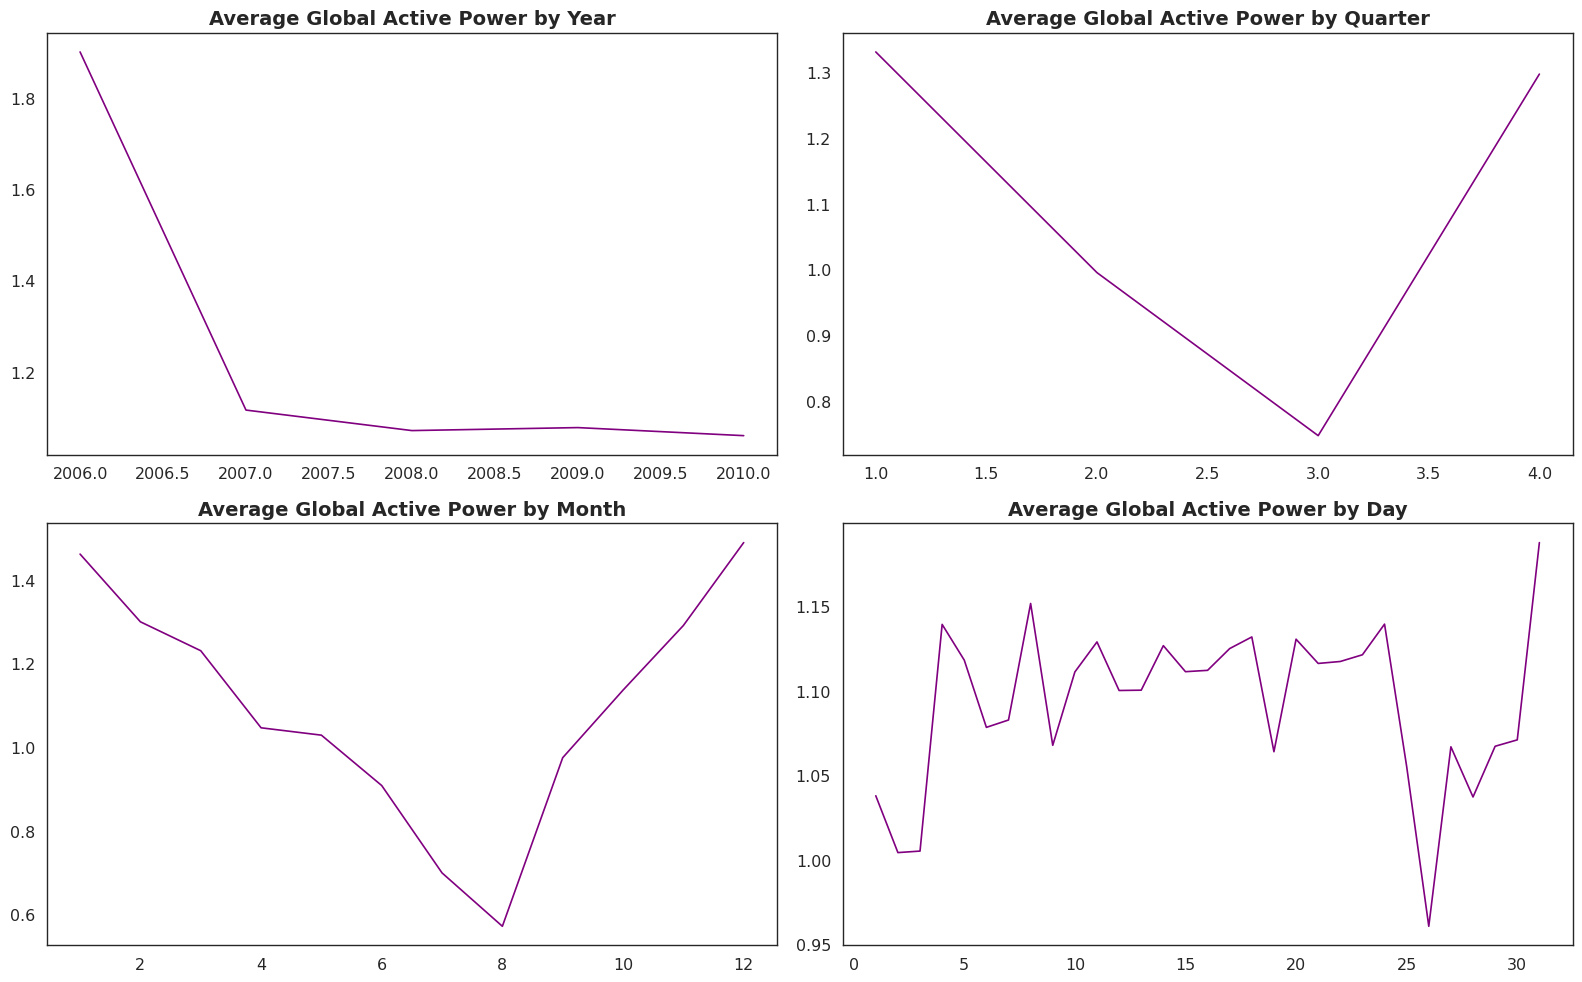

In [ ]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

This code snippet performs the following data preprocessing steps for time series forecasting using a recurrent neural network (RNN) model:

1. Transform the 'Global_active_power' column of the DataFrame `data` into a numpy array of float values
2. Reshape the numpy array into a 2D array with 1 column:
3. Create an instance of the MinMaxScaler class to scale the values between 0 and 1

4. Fit the MinMaxScaler to the transformed data and transform the values:
  

5. Split the transformed data into a training set (80%) and a test set (20%):
   

These steps are common preprocessing techniques used in time series forecasting tasks. The data is first transformed and scaled to ensure that all values are within the same range, which helps improve the training stability of the neural network model. Then, the data is split into training and test sets for model evaluation.

In [ ]:
#Transform the Global_active_power column of the data DataFrame into a numpy array of float values

dataset = data.Global_active_power.values.astype('float32')
#Reshape the numpy array into a 2D array with 1 column

dataset = np.reshape(dataset, (-1, 1))
#Create an instance of the MinMaxScaler class to scale the values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
#Fit the MinMaxScaler to the transformed data and transform the values

dataset = scaler.fit_transform(dataset)
#Split the transformed data into a training set (80%) and a test set (20%)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

This function `create_dataset(dataset, look_back=1)` is used to convert a time series dataset into a supervised learning problem dataset suitable for training a recurrent neural network (RNN) model. It creates input-output pairs, where each input consists of a sequence of past observations (look_back) and the corresponding output is the observation following that sequence.

Here's a breakdown of the function:

1. **Inputs**:
   - `dataset`: The input time series dataset.
   - `look_back`: The number of previous time steps to use as input features for predicting the next time step. Default is 1.

2. **Outputs**:
   - `X`: A list of input sequences, where each sequence contains `look_back` time steps.
   - `Y`: A list of corresponding output values.

3. **Functionality**:
   - Iterate through the input `dataset` from the beginning to the end, excluding the last `look_back + 1` elements (as there won't be enough future observations for prediction).
   - For each iteration:
     - Extract a sequence of `look_back` time steps as input (`X`).
     - Extract the next observation as the output (`Y`).
   - Append the input sequence (`X`) and output value (`Y`) to their respective lists.
   - Finally, convert the lists to numpy arrays and return them.

By using this function, you can create input-output pairs suitable for training RNN models for time series prediction tasks, where the model predicts the next value in the sequence based on the previous `look_back` values.

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [ ]:
X_train.shape

(1639393, 30)

In [ ]:
Y_train.shape

(1639393,)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape

(1639393, 1, 30)

This code defines an LSTM (Long Short-Term Memory) model for time series forecasting using the Keras framework. Here's a breakdown of each part of the code:

1. **Defining the LSTM Model**:
   - `model = Sequential()`: This initializes a sequential model.
   - `model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))`: This adds the first LSTM layer to the model with 100 units. The `input_shape` parameter specifies the shape of the input data. In this case, it's `(number_of_time_steps, number_of_features)`.
   - `model.add(Dropout(0.2))`: This adds a dropout layer with a dropout rate of 0.2 to avoid overfitting.
   - `model.add(Dense(1))`: This adds a dense layer with 1 unit to make predictions.

2. **Compiling the Model**:
   - `model.compile(loss='mean_squared_error', optimizer='adam')`: This compiles the model. The loss function is set to mean squared error, and the Adam optimizer is used for optimization.

3. **Training the Model**:
   - `history = model.fit(...)`: This fits the model on the training data. It specifies the number of epochs, batch size, validation data, and callbacks (in this case, early stopping to avoid overfitting).
   
4. **Displaying Model Summary**:
   - `model.summary()`: This displays a summary of the model, including the architecture, the number of parameters, and output shapes at each layer.

By executing this code, you define, compile, train, and evaluate an LSTM model for time series forecasting using the provided training data (`X_train` and `Y_train`). The model architecture consists of an LSTM layer followed by a dropout layer and a dense output layer.

In [ ]:
# Defining the LSTM model
model = Sequential()

# Adding the first layer with 100 LSTM units and input shape of the data
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.2))

# Adding a dense layer with 1 unit to make predictions
model.add(Dense(1))

# Compiling the model with mean squared error as the loss function and using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the model on training data and using early stopping to avoid overfitting
history = model.fit(X_train, Y_train, epochs=20, batch_size=1240, validation_data=(X_test, Y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

# Displaying a summary of the model
model.summary()

Epoch 1/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - loss: 0.0025 - val_loss: 4.1064e-04
Epoch 2/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - loss: 8.5370e-04 - val_loss: 3.9416e-04
Epoch 3/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - loss: 8.4049e-04 - val_loss: 3.9794e-04
Epoch 4/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - loss: 8.1412e-04 - val_loss: 3.8945e-04
Epoch 5/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 8.1982e-04 - val_loss: 3.9144e-04
Epoch 6/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 8.1303e-04 - val_loss: 3.8897e-04
Epoch 7/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 8.0744e-04 - val_loss: 3.8837e-04
Epoch 8/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 8.0400e-04 - val_loss: 3.8831e-04
Epoch 9/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - loss: 8.0078e-04 - val_loss: 3.8846e-04
Epoch 10/20
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 7.9649e-04 - val_loss: 3.8803e-04
Epoch 11/20
1323/1323 ━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        52,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,505 (615.26 KB)

 Trainable params: 52,501 (205.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,004 (410.18 KB)

This code snippet performs the following tasks:

1. **Making Predictions**:
   - `train_predict = model.predict(X_train)`: Predictions are made on the training data.
   - `test_predict = model.predict(X_test)`: Predictions are made on the test data.

2. **Inverting Predictions**:
   - `train_predict` and `test_predict` are scaled predictions obtained from the model. These predictions need to be inverted to the original scale using the `inverse_transform` method of the scaler object. This is done to obtain predictions in the same scale as the original data.

3. **Calculating Evaluation Metrics**:
   - `mean_absolute_error` and `root_mean_squared_error` are calculated for both training and test sets using the original (unscaled) data and the predictions. These metrics provide insights into the accuracy of the model predictions compared to the actual values.

4. **Printing Evaluation Results**:
   - The calculated mean absolute error (MAE) and root mean squared error (RMSE) for both the training and test sets are printed to assess the performance of the model.

By executing this code, you evaluate the performance of the LSTM model by comparing its predictions to the actual values on both the training and test sets. The MAE and RMSE metrics provide information about the accuracy of the model's predictions.

In [ ]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

51232/51232 ━━━━━━━━━━━━━━━━━━━━ 73s 1ms/step
12808/12808 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
Train Mean Absolute Error: 0.09757647862612545
Train Root Mean Squared Error: 0.26800402094603093
Test Mean Absolute Error: 0.08249479574725754
Test Root Mean Squared Error: 0.2181057774899812


This code snippet visualizes the training and validation loss (error) of the LSTM model over the epochs. Here's a breakdown of the code:

1. `plt.figure(figsize=(8,4))`: This creates a new figure with a specified size of 8 inches in width and 4 inches in height.

2. `plt.plot(history.history['loss'], label='Train Loss')`: This plots the training loss (error) over the epochs. The `history` object contains the training history returned by the `model.fit()` function, including the loss values at each epoch.

3. `plt.plot(history.history['val_loss'], label='Test Loss')`: This plots the validation loss (error) over the epochs. The validation loss is calculated on a separate validation set (or a portion of the training set) during model training.

4. `plt.title('model loss')`: This sets the title of the plot to 'model loss'.

5. `plt.ylabel('loss')`: This sets the y-axis label to 'loss'.

6. `plt.xlabel('epochs')`: This sets the x-axis label to 'epochs'.

7. `plt.legend(loc='upper right')`: This adds a legend to the plot, indicating the corresponding labels for the training and validation loss curves.

8. `plt.show()`: This displays the plot.

By visualizing the training and validation loss curves, you can monitor the training progress and identify whether the model is overfitting or underfitting. The goal is to see both the training and validation loss decrease steadily over the epochs, indicating that the model is learning the patterns in the data effectively without overfitting.

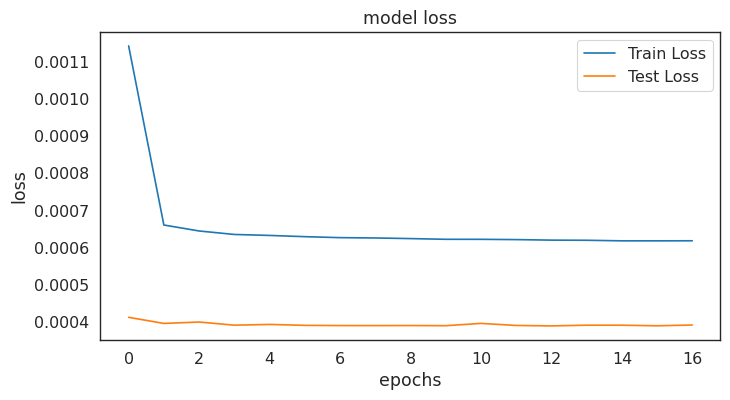

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

This code visualizes the actual values and the predicted values for the first 200 time steps. Here's a breakdown of the code:

1. `plt.figure(figsize=(20,6))`: This creates a new figure with a specified size of 20 inches in width and 6 inches in height.

2. `plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')`: This plots the actual values (Y_test) for the first 200 time steps. The actual values are represented by purple dots.

3. `plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='red')`: This plots the predicted values (test_predict) for the first 200 time steps. The predicted values are represented by a solid red line.

4. `sns.despine(top=True)`: This removes the top spine of the plot for better aesthetics.

5. `plt.subplots_adjust(left=0.07)`: This adjusts the subplot location to leave some space on the left side of the plot.

6. `plt.ylabel('Global_active_power', size=14)`: This labels the y-axis as 'Global_active_power' with a font size of 14.

7. `plt.xlabel('Time step', size=14)`: This labels the x-axis as 'Time step' with a font size of 14.

8. `plt.legend(fontsize=16)`: This adds a legend to the plot with a font size of 16.

9. `plt.show()`: This displays the plot.

By visualizing the actual and predicted values, you can assess how well the model's predictions align with the actual data for the specified time steps.

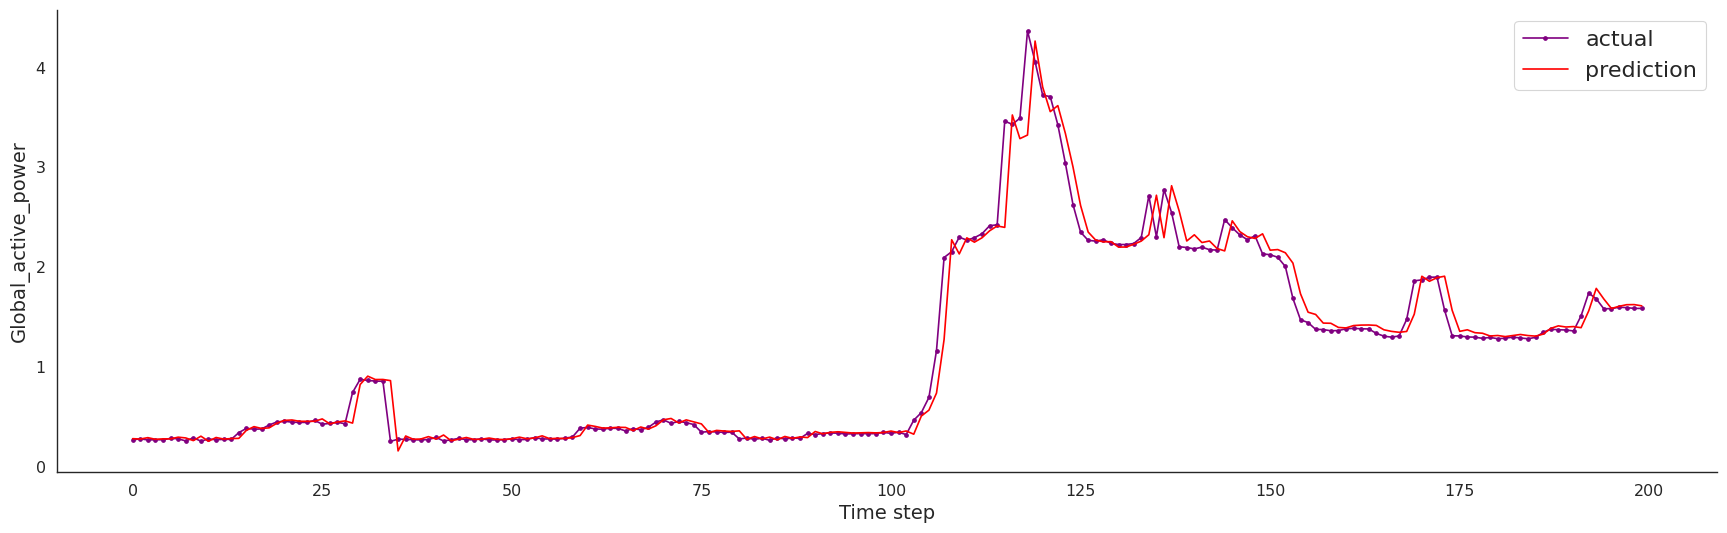

In [ ]:
aa=[x for x in range(200)]
# Creating a figure object with desired figure size
plt.figure(figsize=(20,6))

# Plotting the actual values in blue with a dot marker
plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')

# Plotting the predicted values in green with a solid line
plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='red')

# Removing the top spines
sns.despine(top=True)

# Adjusting the subplot location
plt.subplots_adjust(left=0.07)

# Labeling the y-axis
plt.ylabel('Global_active_power', size=14)

# Labeling the x-axis
plt.xlabel('Time step', size=14)

# Adding a legend with font size of 15
plt.legend(fontsize=16)

# Display the plot
plt.show()

In [ ]:
# Finish task: Summarize findings

print("Model Evaluation Results:")
print(f"Train Mean Absolute Error: {mean_absolute_error(Y_train[0], train_predict[:,0]):.4f}")
print(f"Train Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])):.4f}")
print(f"Test Mean Absolute Error: {mean_absolute_error(Y_test[0], test_predict[:,0]):.4f}")
print(f"Test Root Mean Squared Error: {np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])):.4f}")

print("\nVisualizations show:")
print("- The distribution of Global Active Power is not normal, as indicated by the D'Agostino-Pearson test and the distribution plot.")
print("- There are clear seasonal patterns in power consumption, with higher averages in winter months and lower in summer.")
print("- The LSTM model shows good performance on the test set, with low MAE and RMSE values and predictions closely following actual values for the plotted time steps.")

Model Evaluation Results:
Train Mean Absolute Error: 0.0976
Train Root Mean Squared Error: 0.2680
Test Mean Absolute Error: 0.0825
Test Root Mean Squared Error: 0.2181

Visualizations show:
- The distribution of Global Active Power is not normal, as indicated by the D'Agostino-Pearson test and the distribution plot.
- There are clear seasonal patterns in power consumption, with higher averages in winter months and lower in summer.
- The LSTM model shows good performance on the test set, with low MAE and RMSE values and predictions closely following actual values for the plotted time steps.
